<a href="https://colab.research.google.com/github/krishnan5307/-5307-krishnan/blob/main/diabetes_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DIabetes_prediction/diabetes_prediction_dataset.csv", sep=",", header=0)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()  ## gives all numerical column/series info

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


##In Data Analysis What All Things We Do

###Missing Values
###Explore About the Numerical Variables
###Explore About categorical Variables
###Finding Relationship between features

In [ ]:

df.shape ## to check no of rows and columns

(100000, 9)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.values

array([['Female', 80.0, 0, ..., 6.6, 140, 0],
       ['Female', 54.0, 0, ..., 6.6, 80, 0],
       ['Male', 28.0, 0, ..., 5.7, 158, 0],
       ...,
       ['Male', 66.0, 0, ..., 5.7, 155, 0],
       ['Female', 24.0, 0, ..., 4.0, 100, 0],
       ['Female', 57.0, 0, ..., 6.6, 90, 0]], dtype=object)

In [ ]:
df.dtypes[df.dtypes == 'O'].count()

2

In [ ]:
df.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O' ]
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O' ]

In [ ]:
numerical_features

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [ ]:
categorical_features

['gender', 'smoking_history']

In [ ]:
df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

### Duplicate ROws Count

In [ ]:
df.duplicated().sum()

3854

### Remove Duplicate rows Values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(96146, 9)

## To show normal and standard normal distribution of data

<ipython-input-20-a28bea42edf9>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_standardized = (df - df.mean()) / df.std()
<ipython-input-20-a28bea42edf9>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_standardized = (df - df.mean()) / df.std()


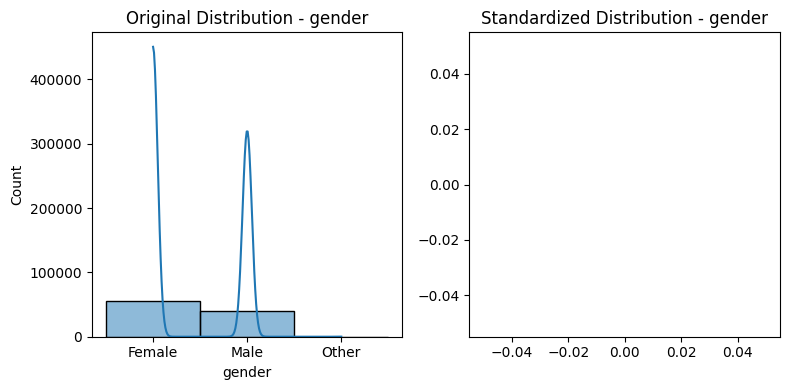

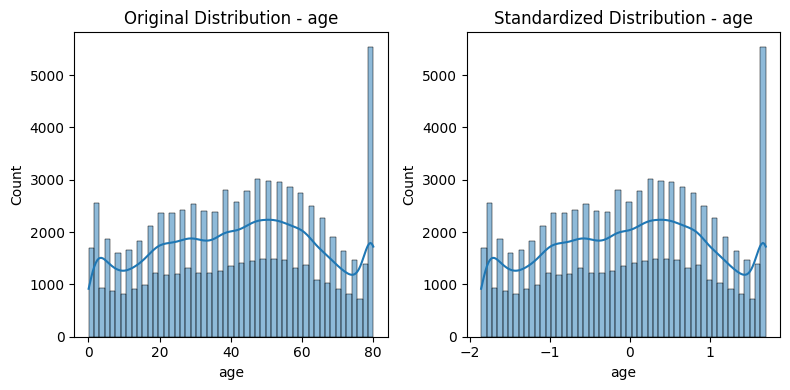

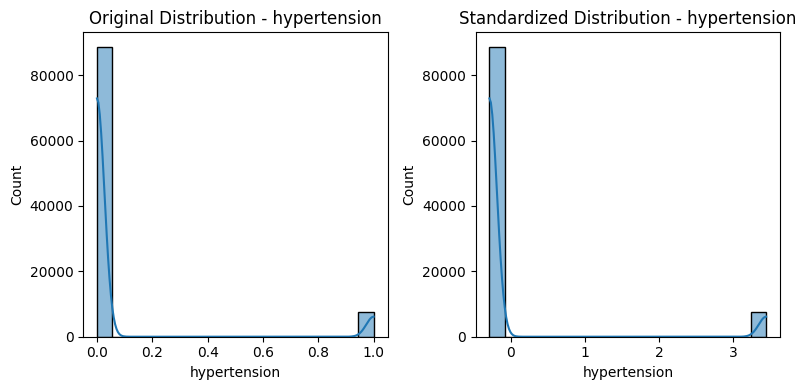

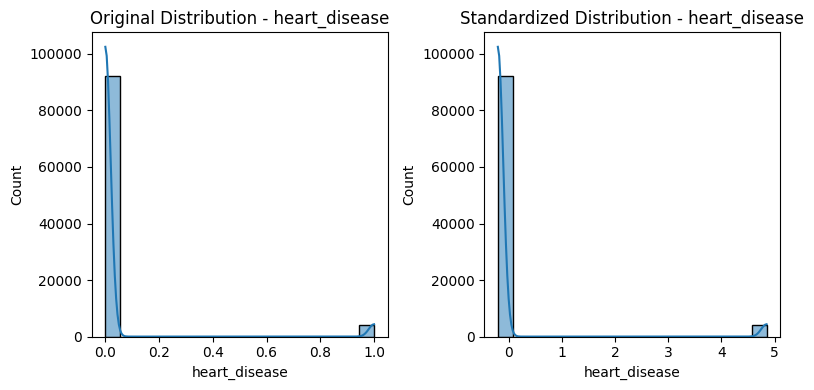

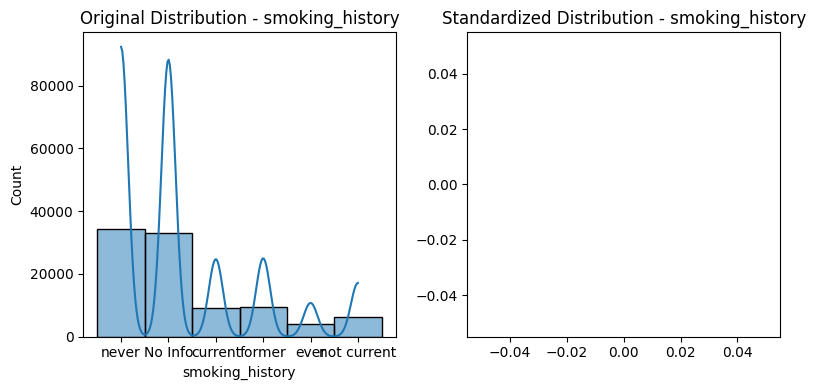

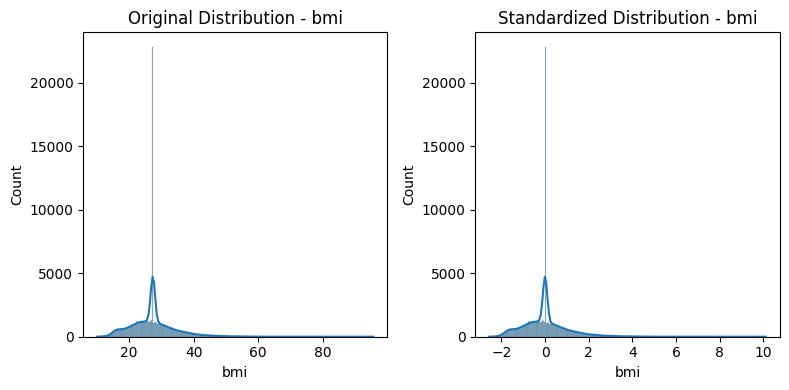

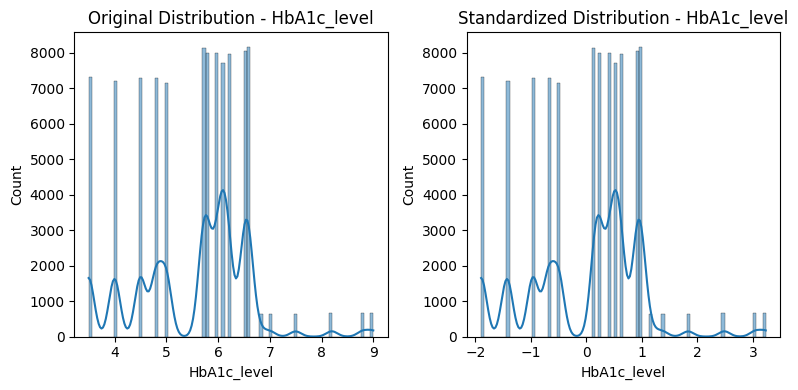

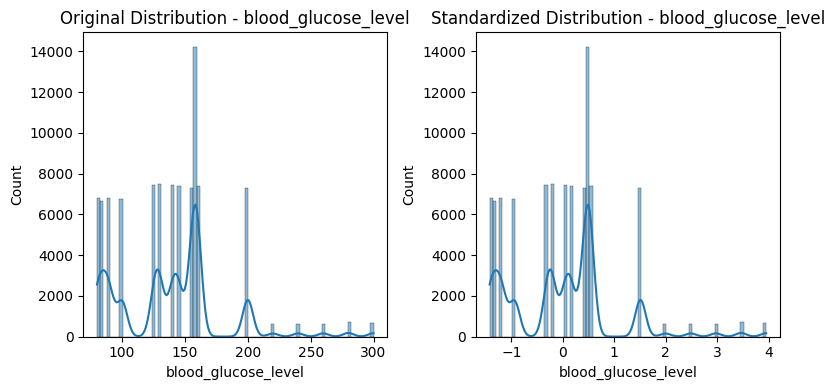

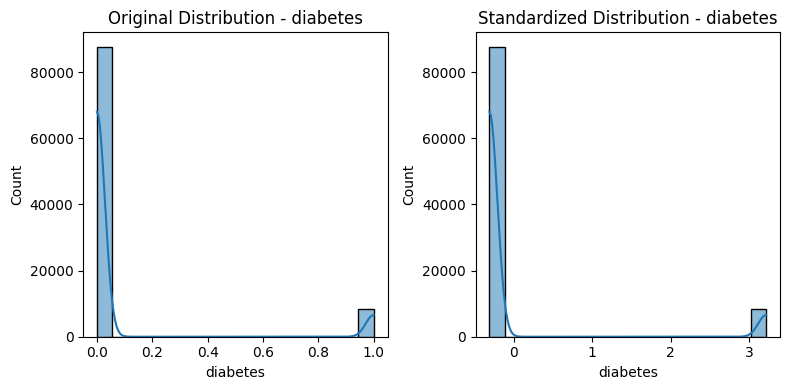

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Calculate z-scores for standardization
df_standardized = (df - df.mean()) / df.std()

# Plot histograms of the original and standardized data
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Original Distribution - {column}")
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_standardized, x=column, kde=True)
    plt.title(f"Standardized Distribution - {column}")
    plt.tight_layout()
    plt.show()


<Axes: xlabel='smoking_history', ylabel='count'>

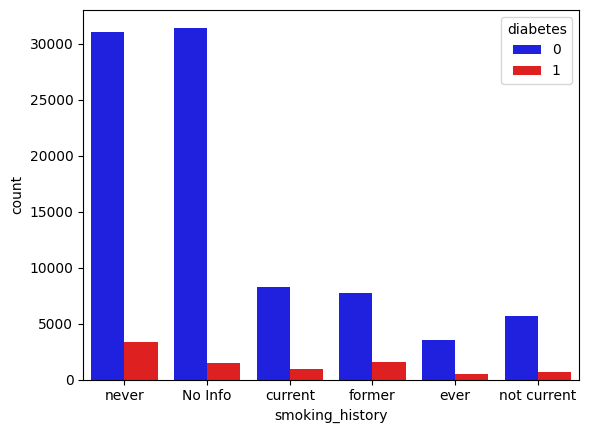

In [ ]:
## Count plot
sns.countplot(x="smoking_history",data=df,hue= 'diabetes',palette=['blue','red','orange','yellow','green','green'])

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: xlabel='smoking_history', ylabel='diabetes'>

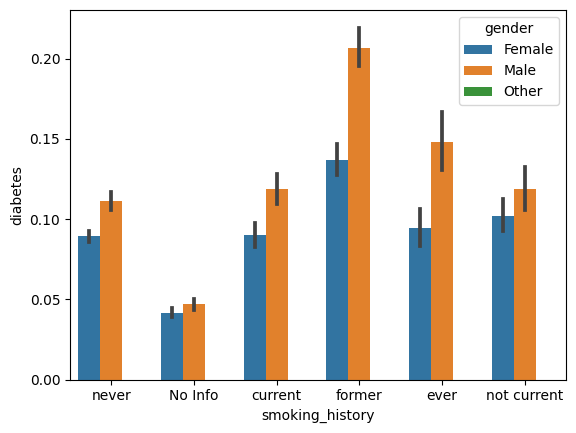

In [ ]:
sns.barplot(x='smoking_history',y='diabetes',hue='gender',data=df)

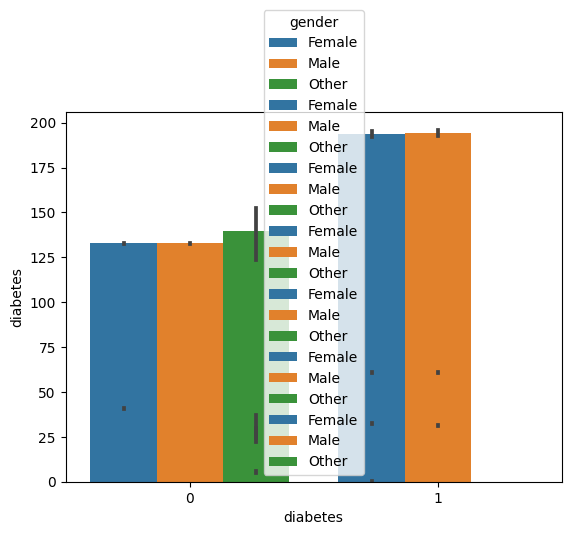

In [ ]:
## Visualization
for feature in numerical_features:
  sns.barplot(y=feature,x='diabetes',hue='gender',data=df)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Feature seection methods:

## correaltion in graph

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'feature1' and 'feature2' are the names of the two features
correlation = df['blood_glucose_level'].corr(df['bmi'])
print("Correlation:", correlation)

Correlation: 0.09254270590695592


A correlation value of 0.09 indicates a weak positive correlation between the two variables.

In correlation analysis, the correlation coefficient ranges from -1 to 1. A value of 0 represents no correlation, a positive value indicates a positive correlation, and a negative value indicates a negative correlation.

A correlation coefficient of 0.09 suggests a very weak positive relationship between the variables. However, it is important to note that the strength of the correlation can be subjective and dependent on the context of the data and the field of study.

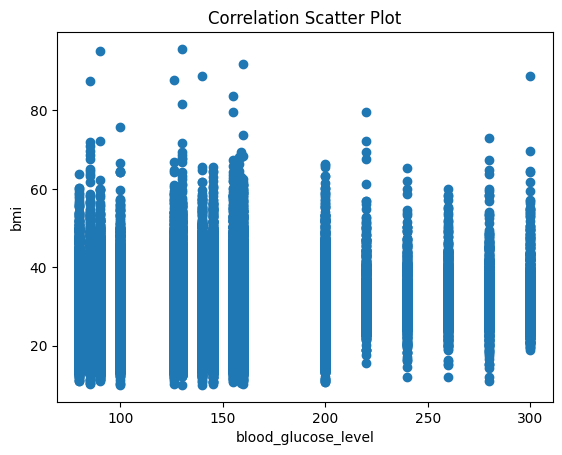

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'feature1' and 'feature2' are the names of the two features
plt.scatter(df['blood_glucose_level'], df['bmi'])
plt.xlabel('blood_glucose_level')
plt.ylabel('bmi')
plt.title('Correlation Scatter Plot')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'feature1' and 'feature2' are the names of the two features
covariance = df['blood_glucose_level'].cov(df['bmi'])
pearson_corr = df['blood_glucose_level'].corr(df['bmi'], method='pearson')
spearman_corr = df['blood_glucose_level'].corr(df['bmi'], method='spearman')

print("Covariance:", covariance)
print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)


Covariance: 25.62190070169266
Pearson Correlation: 0.09254270590695592
Spearman Correlation: 0.05985817045613226


<ipython-input-29-c722a8396513>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')


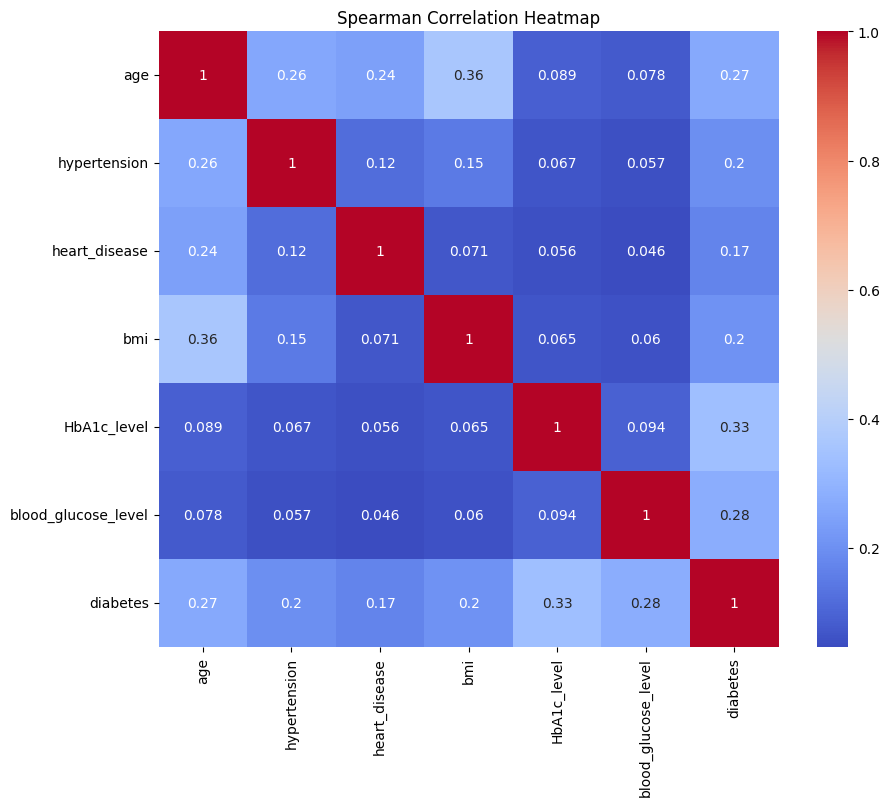

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with multiple features
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(10, 8)) #specific size of 10 inches (width) by 8 inches (height). The figsize parameter expects a tuple of two values representing the width and height in inches, respectively.
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()


<ipython-input-30-102a047953d8>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method=method)


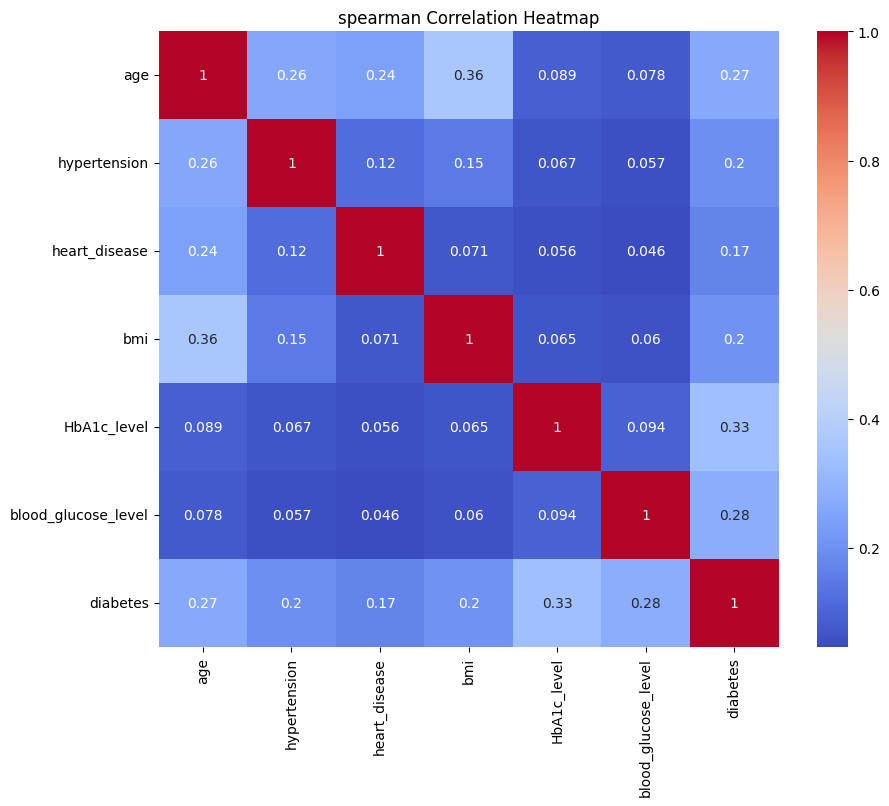

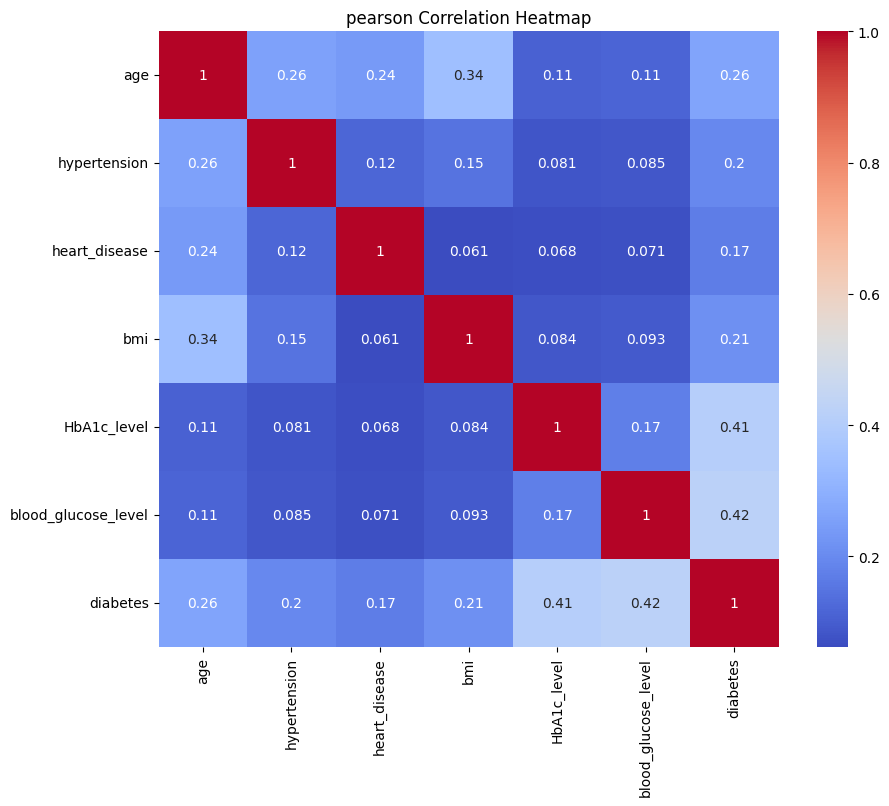

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


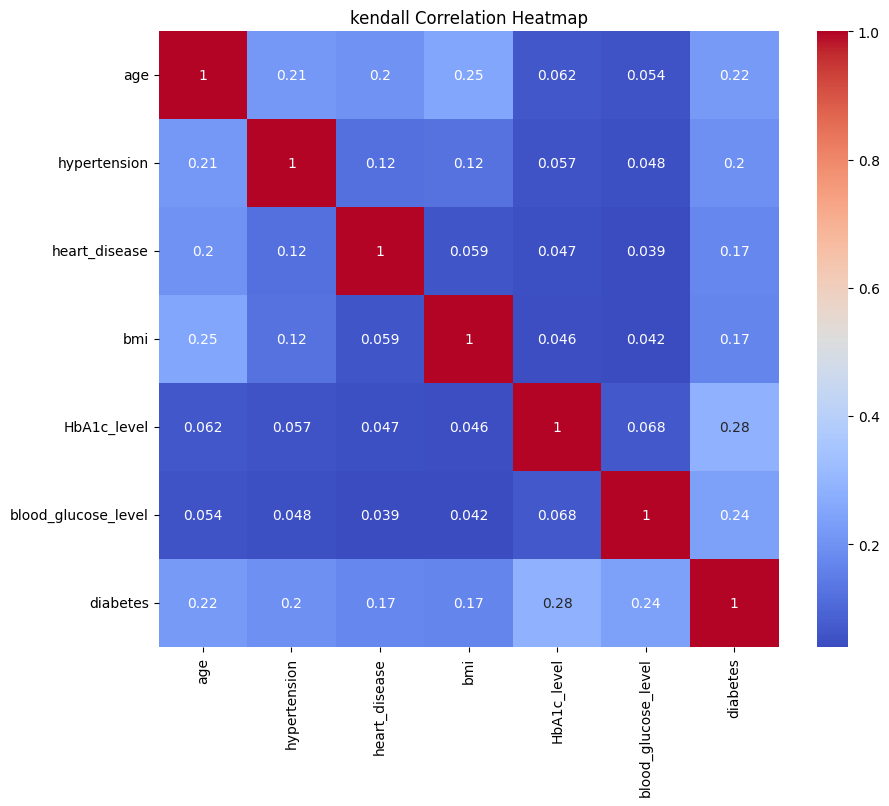

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with multiple features
correlations = ['spearman','pearson','kendall']


for method in correlations:
  corr = df.corr(method=method)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, cmap='coolwarm')
  plt.title(f'{method} Correlation Heatmap')
  plt.show()

In [ ]:
df.corr

<bound method DataFrame.corr of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

<ipython-input-32-653070d67741>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


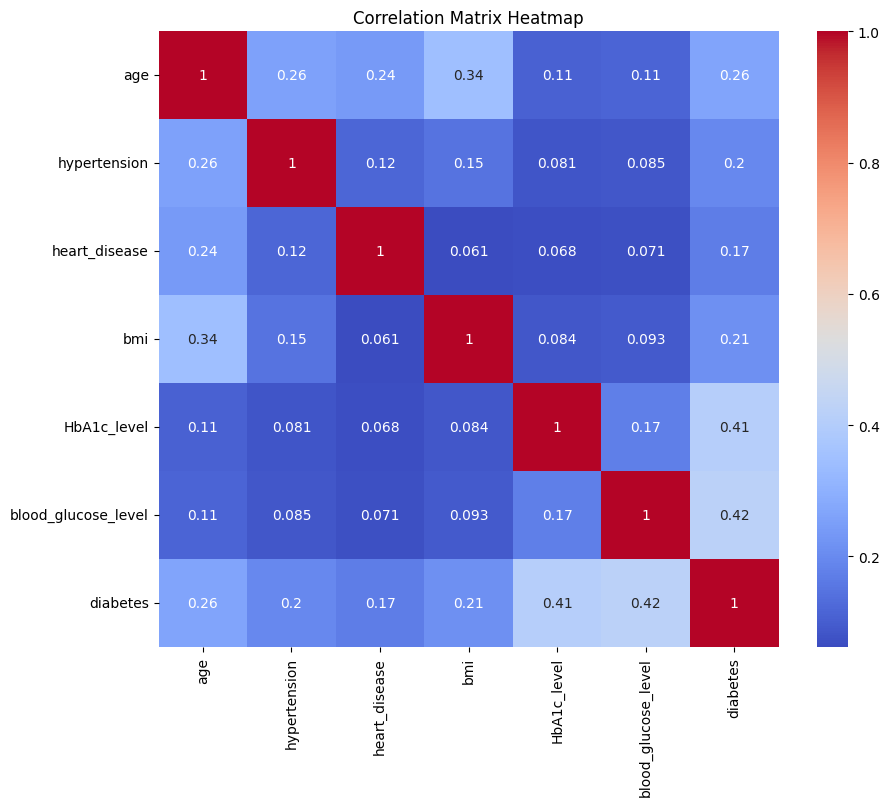

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with multiple features
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
## to convert lost into string_literals to be dsplayed using print function
my_list = ['apple', 'banana', 'orange']
output = ', '.join(my_list)
print(f"My list of fruits: {output}")

My list of fruits: apple, banana, orange


# Feature seection methods:

##  Performing Chi square test and Annova test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

# Assuming 'df' is your DataFrame and 'categorical_column' and 'numerical_column' are the names of the columns

# Chi-square test
def perform_chi_square_test(df, categorical_features, target_varable):
  for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_varable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test result: {feature} vs {target_varable}")
    print("Chi2 statistic:", chi2)
    print("P-value:", p_value)

# ANOVA test
def perform_anova_test(df, categorical_features, numerical_features):
  for feature in numerical_features:
    groups = [data_group[1][feature].values for data_group in df.groupby(categorical_features)]
    f_statistic, p_value = f_oneway(*groups)
    categorical_features_string = ', '.join(categorical_features)
    print(f"ANOVA test result: grouping based on feature:{feature}, categorical columns:'{categorical_features_string}', groups formed:{groups}")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

# Call the functions
perform_chi_square_test(df, categorical_features,target_varable='diabetes')
perform_anova_test(df, categorical_features, numerical_features)




### inference- low p value (<0.05) and high stats value indicate good asscoaicaltion btw catergrical varuables in chi square test


Chi-square test result: gender vs diabetes
Chi2 statistic: 139.3851343057988
P-value: 5.4063313009771595e-31
Chi-square test result: smoking_history vs diabetes
Chi2 statistic: 1728.318606625952
P-value: 0.0
ANOVA test result: grouping based on feature:age, categorical columns:'gender, smoking_history', groups formed:[array([54., 79., 76., ..., 21., 36.,  2.]), array([36., 41., 30., ..., 51., 61., 57.]), array([59., 38., 55., ..., 62., 26., 59.]), array([54., 78., 72., ..., 56., 47., 45.]), array([80., 20., 44., ..., 26., 40., 24.]), array([21., 27., 19., ..., 54., 38., 57.]), array([78.,  5., 50., ..., 26., 80., 19.]), array([76., 40., 50., ..., 44., 13., 22.]), array([37., 59., 24., ..., 74., 26., 32.]), array([40., 73., 50., ..., 55., 52., 66.]), array([28., 42., 15., ..., 38., 13., 14.]), array([67., 43., 65., ..., 28.,  8., 48.]), array([19., 23., 53., 55., 19.,  7.]), array([28.]), array([45., 47., 47.]), array([10., 39., 10., 18., 10., 52., 26., 24.])]
F-statistic: 864.032460551

The code provided for performing the chi-square test and ANOVA test allows us to obtain statistical information and make inferences about the relationships and differences in the data.

For the chi-square test:

The chi-square statistic value indicates the strength of the relationship between the categorical column and the target variable. A higher chi-square value suggests a stronger association.
The p-value represents the statistical significance of the relationship. If the p-value is below a certain significance level (e.g., 0.05), it suggests that there is a significant association between the categorical column and the target variable.
From the chi-square test results, we can infer whether there is a significant relationship between the categorical column and the target variable. If the p-value is below the significance level, we can conclude that there is evidence of a significant association between the two variables.

For the ANOVA test:

The F-statistic value indicates the magnitude of the differences in means between the groups defined by the categorical column.
The p-value represents the statistical significance of the differences in means. A p-value below a certain significance level indicates that there are significant differences between the groups.
From the ANOVA test results, we can infer whether there are significant differences in the means of the numerical column across the groups defined by the categorical column. If the p-value is below the significance level, we can conclude that there are significant differences in means among the groups.

In both tests, the interpretation of the results depends on the specific dataset and research context. It is important to carefully consider the p-value and other relevant factors when drawing conclusions and making inferences from the statistical tests.

Remember, statistical tests provide evidence of relationships or differences, but they do not establish causation or provide a complete understanding of the underlying factors. Additional analysis and domain knowledge are often necessary for a comprehensive interpretation of the results.





# New section

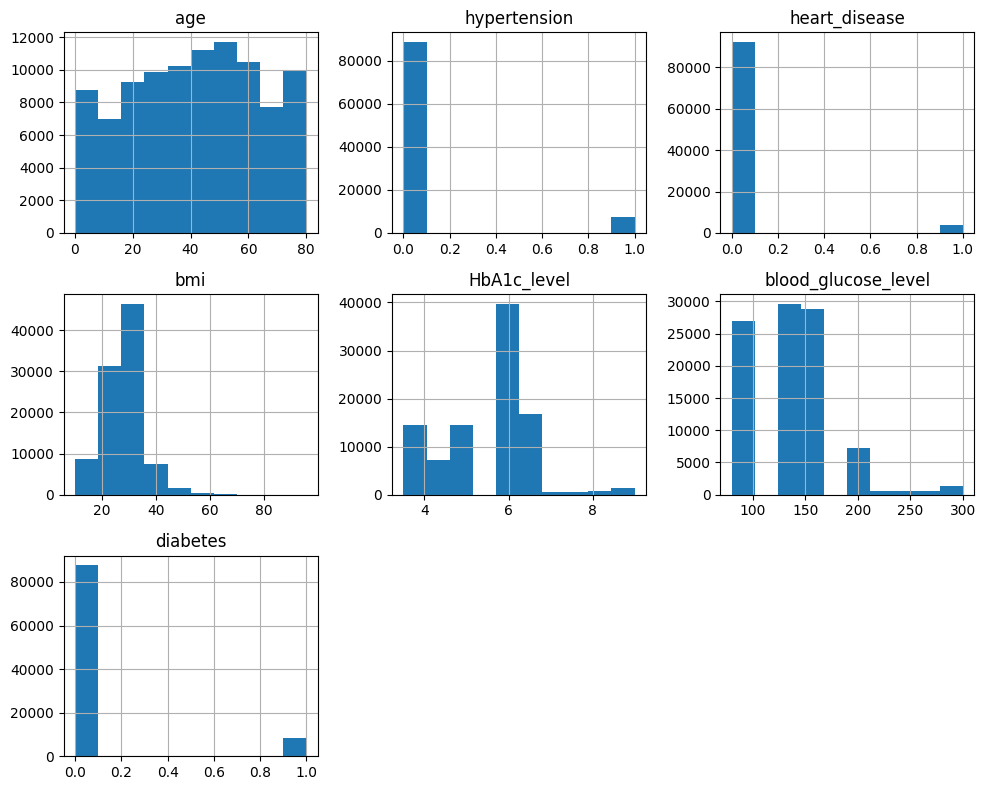

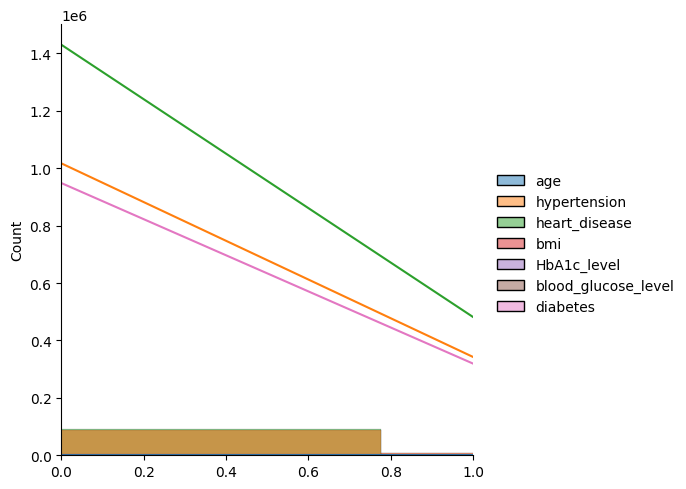

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Histogram
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Kernel density plot
sns.displot(data=df, kde=True)
plt.xlim(0, 1)
plt.show()


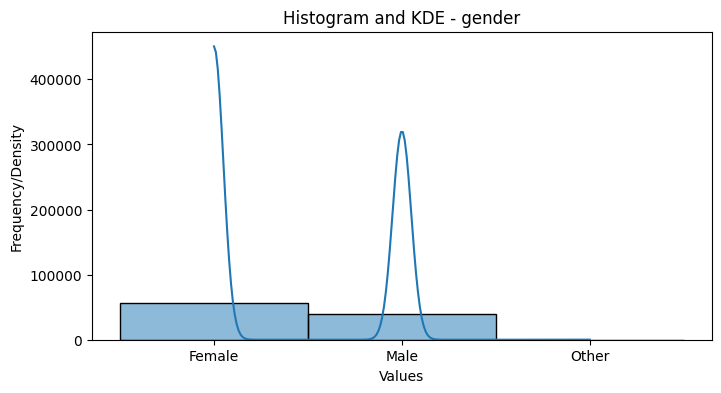

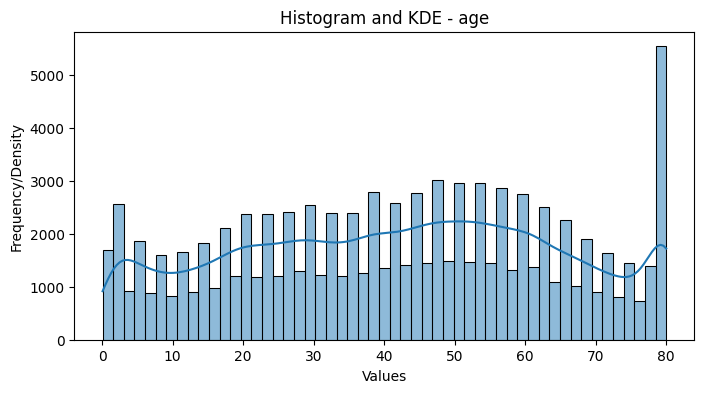

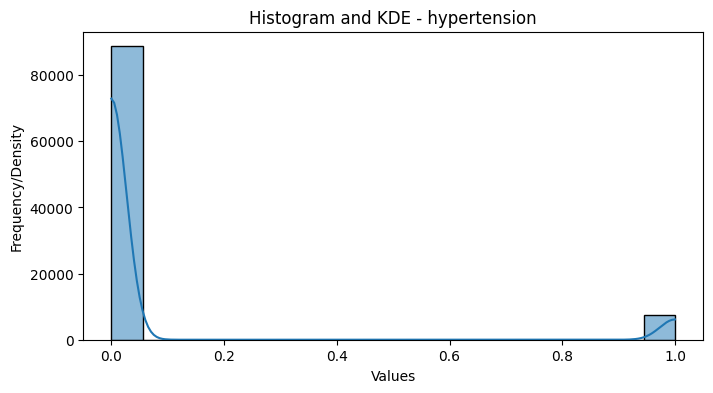

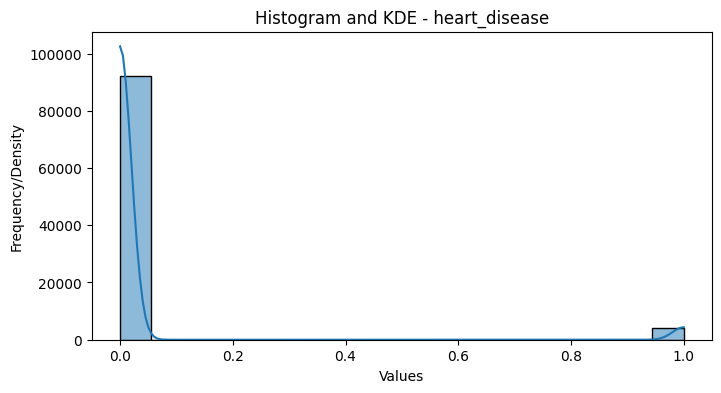

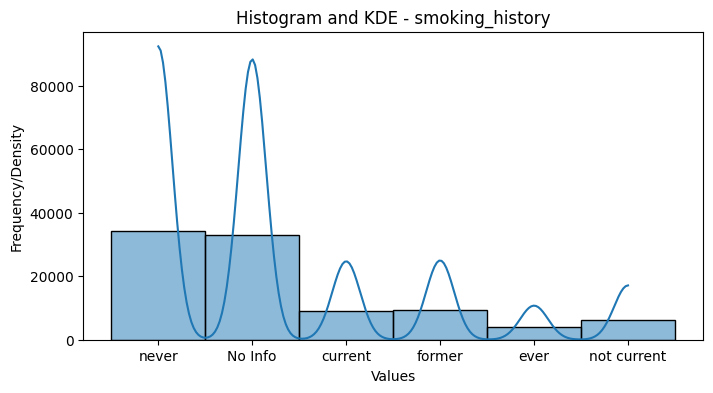

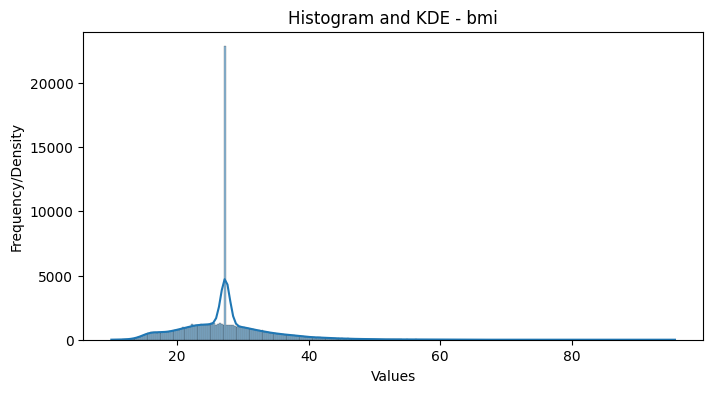

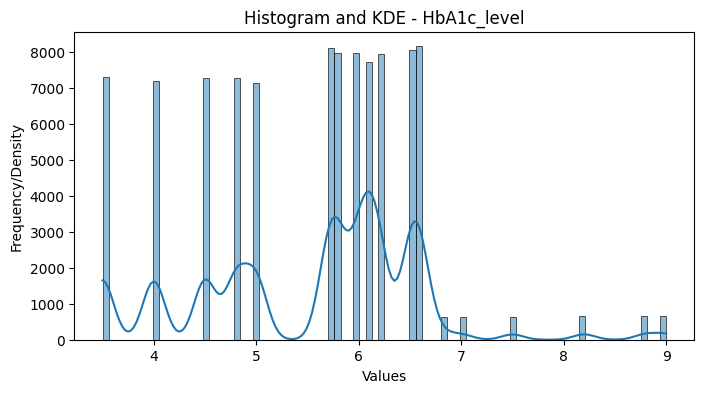

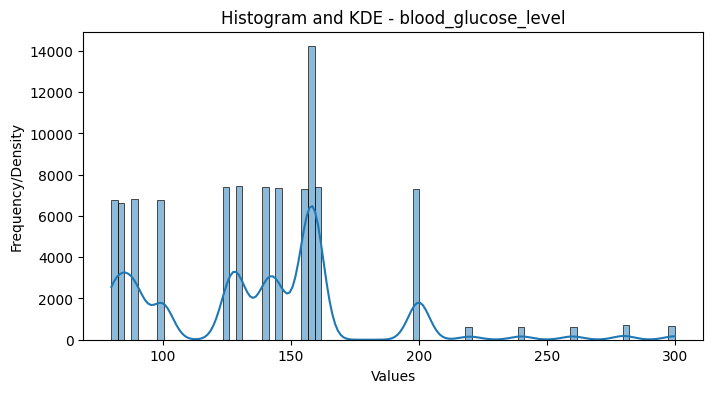

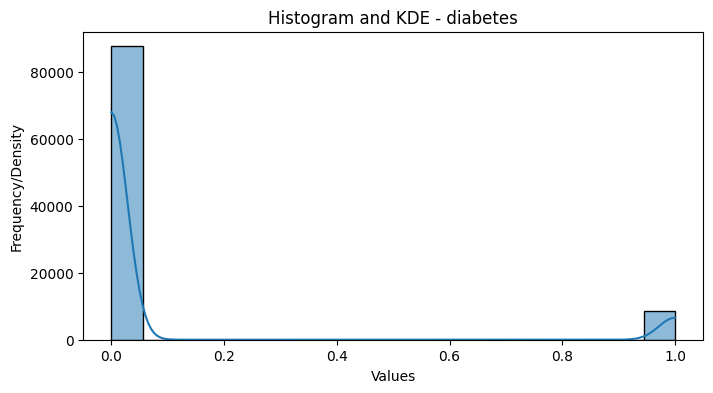

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Iterate over each column in the DataFrame
for column in df.columns:
    # Create a figure with subplots for histogram and KDE
    fig, ax = plt.subplots(figsize=(8, 4)) ### syntax is used to assign the figure and axes objects simultaneously.

    # Plot histogram
    sns.histplot(data=df, x=column, ax=ax, kde=True)

    # Plot KDE
    ##sns.kdeplot(data=df, x=column, ax=ax)

    # Set labels and title
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency/Density')
    ax.set_title(f'Histogram and KDE - {column}')

    # Show the plot
    plt.show()


## Discrete features

In [ ]:
### numerical variables- 2 Types
##1. Continuous variable and Discrete variable

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<=25]
print(len(discrete_feature))

5


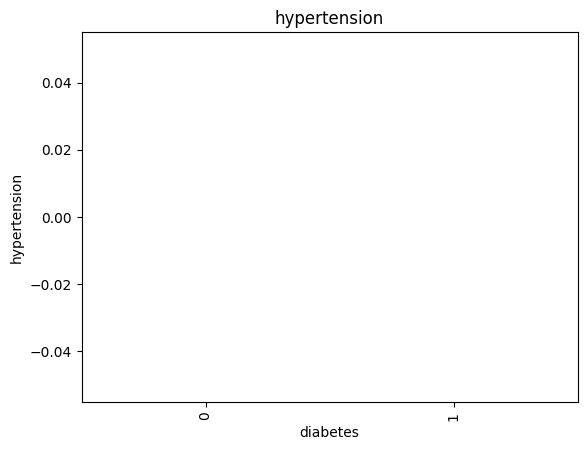

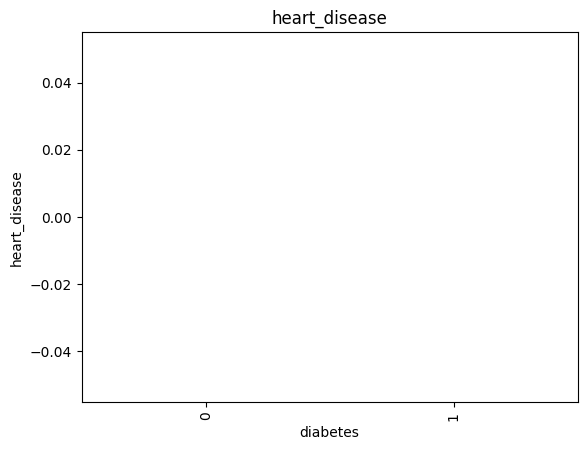

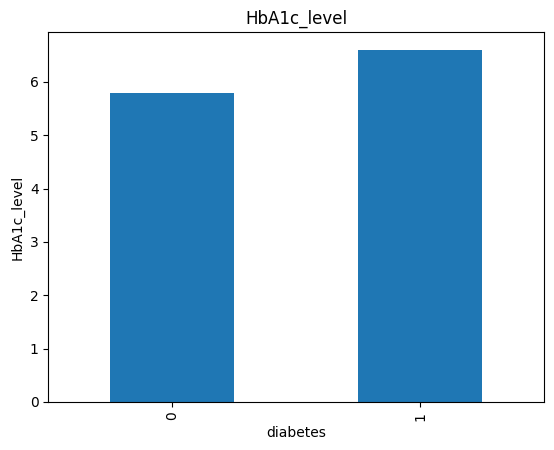

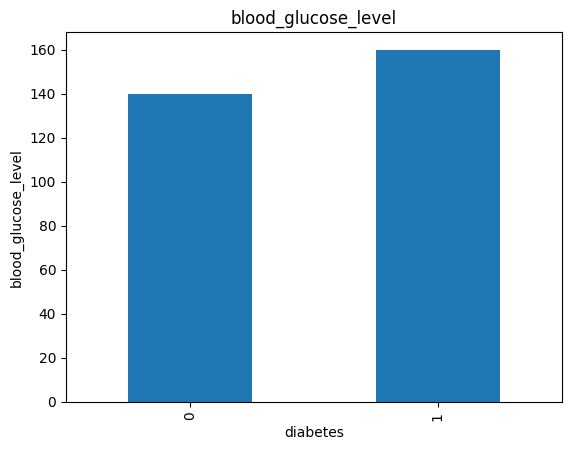

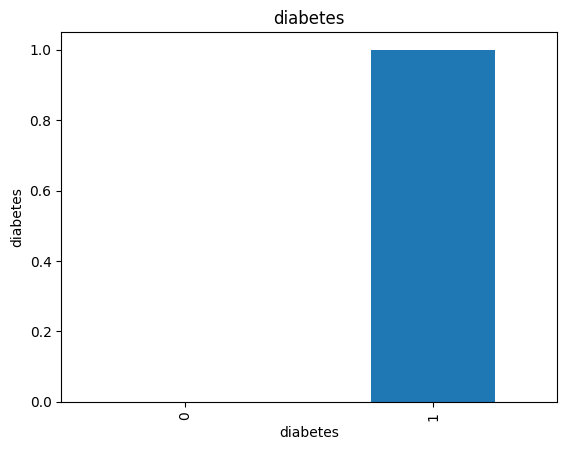

In [ ]:
## Lets find the relationship between Discrete and diabetes
data=df.copy()
for feature in discrete_feature:
    data.groupby('diabetes')[feature].median().plot.bar()
    plt.ylabel(feature)
    plt.xlabel('diabetes')
    plt.title(feature)
    plt.show()

In [ ]:
df['heart_disease'].unique()

array([1, 0])

## Continuous feature

In [ ]:
## Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(len(continuous_feature))

2


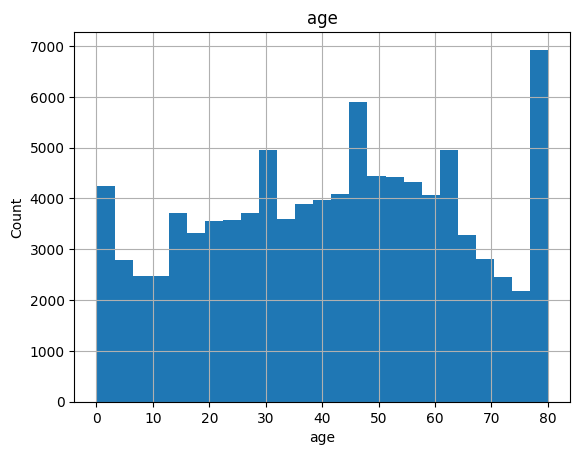

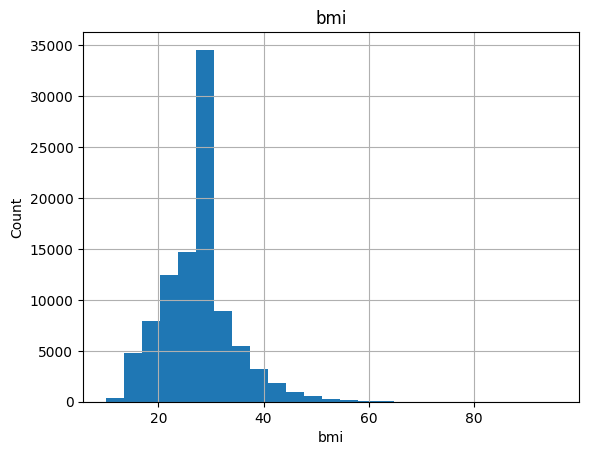

In [ ]:
### Lets analyze the continous values by creating histograms to understand the distribution
data=df.copy()
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

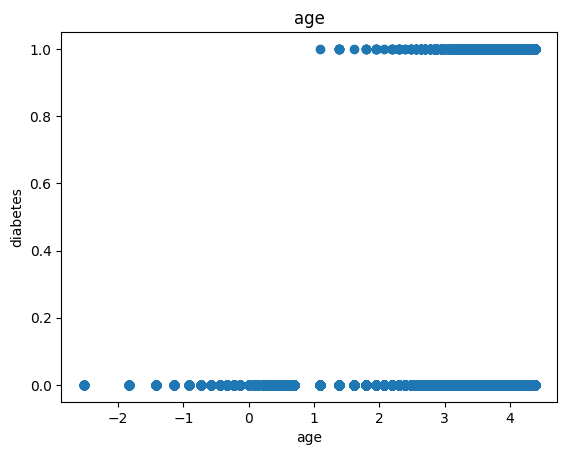

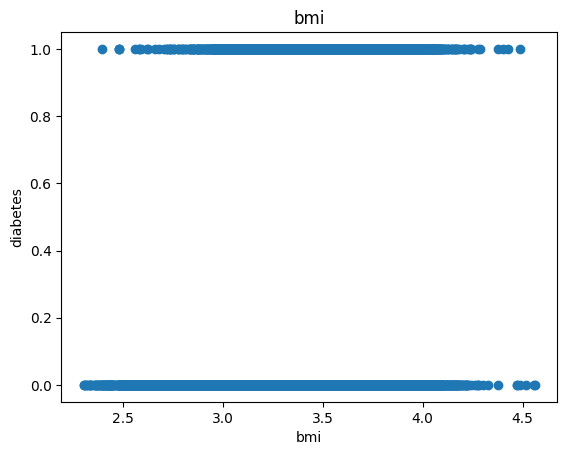

In [ ]:
## We will be using logarithmic transformation
data=df.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['diabetes'])
        plt.xlabel(feature)
        plt.ylabel('diabetes')
        plt.title(feature)
        plt.show()

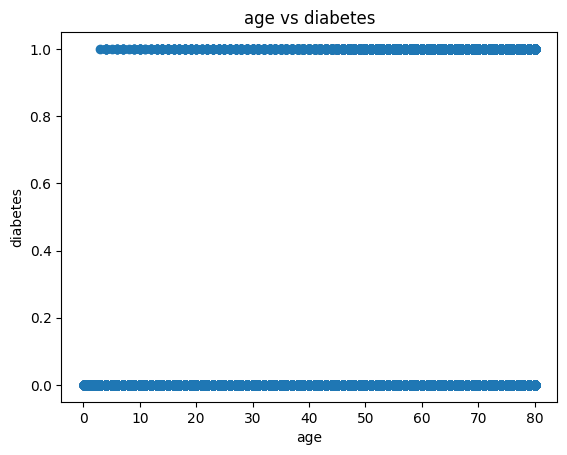

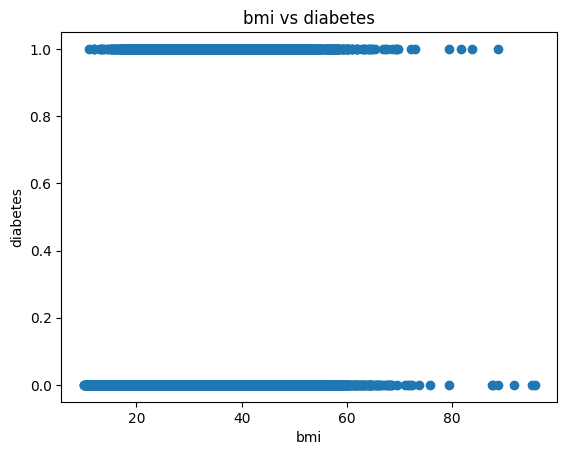

In [ ]:
for feature in continuous_feature:
  plt.scatter(df[feature],df['diabetes'])
  plt.xlabel(feature)
  plt.ylabel('diabetes')
  plt.title(f'{feature} vs diabetes')
  plt.show()

### Scatter plot is basiclly not needed for classfication especially for target varbale as it can only have binary or n number of output, like here diabetes or not

# Outliers

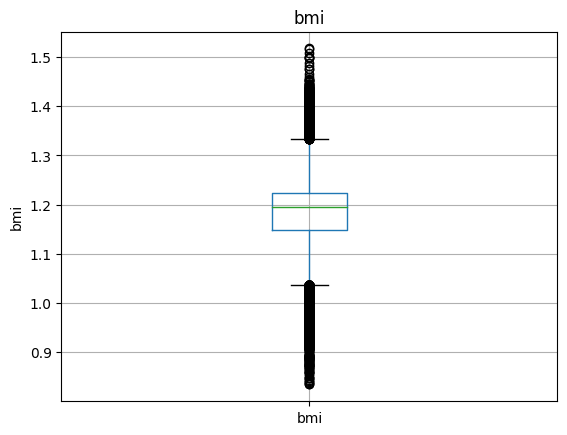

In [ ]:
## Outliers
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Performing a log transformation before creating a boxplot is a common data preprocessing step used in certain scenarios. Here's why it might be done:

Skewed Data: Log transformation is often applied to data that exhibits skewness, where the data points are not evenly distributed around the mean. Skewed data can make it difficult to interpret and compare the values, especially in statistical analysis or visualizations. Taking the logarithm of the data can help reduce the skewness and make the distribution more symmetrical.

Variance Stabilization: Log transformation can stabilize the variance of the data. In some cases, the spread of data points may increase or decrease with the magnitude of the values. Taking the logarithm can help mitigate this issue by compressing the range of values and reducing the impact of extreme values on the overall spread.

Outlier Detection: Log transformation can highlight outliers in the data. Outliers are data points that deviate significantly from the majority of the data. By taking the logarithm, the differences between extreme values and the rest of the data are amplified, making outliers more apparent in the boxplot.

By performing a log transformation before creating a boxplot, you can address the issues related to skewness, variance, and outliers, leading to a more informative and visually appealing representation of the data distribution. It can help reveal patterns, identify anomalies, and make it easier to interpret and compare the data across different categories or variables.

## code to find outliers and its value in data set and also what to di for it


In [ ]:
def outlier_check(df, continuous_feature):

  import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the first quartile (Q1) and third quartile (Q3)
  Q1 = df[continuous_feature].quantile(0.25)
  Q3 = df[continuous_feature].quantile(0.75)

# Calculate the interquartile range (IQR)
  IQR = Q3 - Q1

# Define the upper and lower bounds for outliers detection
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Find outliers and their values
  outliers = df[continuous_feature][(df[continuous_feature] < lower_bound) | (df[continuous_feature] > upper_bound)]
  outliers_value = outliers.stack()

# Print the outliers and their corresponding values
  print("Outliers and their Values: ")
  print(f"outliers count: {outliers_value.count()}" )
  print(outliers_value)



In [ ]:
outlier_check(df, continuous_feature)

Outliers and their Values: 
outliers count: 5354
11     bmi    54.70
39     bmi    56.43
59     bmi    63.48
93     bmi    55.61
98     bmi    50.13
              ...  
99933  bmi    13.34
99948  bmi    39.62
99953  bmi    60.52
99960  bmi    45.15
99993  bmi    40.69
Length: 5354, dtype: float64


In [ ]:
outlier.info()

NameError: ignored

In [ ]:
IQR

NameError: ignored

In [ ]:
Q1, Q3

NameError: ignored

In [ ]:
continuous_feature,lower_bound, upper_bound

NameError: ignored

In [ ]:
df2 = df.copy()

for feature in continuous_feature:
    # Calculate the median and bounds for the current feature
    median_value = df2[feature].median()
    lower_bound = df2[feature].quantile(0.25) - 1.5 * (df2[feature].quantile(0.75) - df2[feature].quantile(0.25))
    upper_bound = df2[feature].quantile(0.75) + 1.5 * (df2[feature].quantile(0.75) - df2[feature].quantile(0.25))
    print(f"{feature}:  Min_value: {df2[feature].min()},Max_value: {df2[feature].max()} ")
    print(f"{feature}:  lower_bound: {lower_bound},upper_bound: {upper_bound}")

    # Filter and replace outliers with the median value
    df2.loc[(df2[feature] < lower_bound) | (df2[feature] > upper_bound), feature] = median_value

df2.head(5)


age:  Min_value: 0.08,Max_value: 80.0 
age:  lower_bound: -28.5,upper_bound: 111.5
bmi:  Min_value: 10.01,Max_value: 95.69 
bmi:  lower_bound: 13.709999999999997,upper_bound: 39.55


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Ther is no outliers in age as it is in the reange , so we focus on bmi

In [ ]:
df2[continuous_feature].describe()

,age,bmi
count,96146.000000,96146.000000
mean,41.794326,26.461164
std,22.462948,5.090160
min,0.080000,13.710000
25%,24.000000,23.500000
50%,43.000000,27.320000
75%,59.000000,28.490000
max,80.000000,39.550000


So now we can see the bmi is also replaced wth mdeian in df2, so no more outlier issue , now we can check with some info from df2 as below

In [ ]:
df2["age"].describe() , df["age"].describe()

(count    96146.000000
 mean        41.794326
 std         22.462948
 min          0.080000
 25%         24.000000
 50%         43.000000
 75%         59.000000
 max         80.000000
 Name: age, dtype: float64,
 count    96146.000000
 mean        41.794326
 std         22.462948
 min          0.080000
 25%         24.000000
 50%         43.000000
 75%         59.000000
 max         80.000000
 Name: age, dtype: float64)

In [ ]:
df2["bmi"].describe() , df["bmi"].describe()

(count    96146.000000
 mean        26.461164
 std          5.090160
 min         13.710000
 25%         23.500000
 50%         27.320000
 75%         28.490000
 max         39.550000
 Name: bmi, dtype: float64,
 count    96146.000000
 mean        27.321461
 std          6.767716
 min         10.010000
 25%         23.400000
 50%         27.320000
 75%         29.860000
 max         95.690000
 Name: bmi, dtype: float64)

In [ ]:
df2[df2["age"]==0.08].head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
2049,Female,0.08,0,0,No Info,27.32,3.5,145,0
3742,Male,0.08,0,0,No Info,27.32,6.6,80,0




To find outliers in a dataset and identify their values, you can use various statistical methods. One common approach is to use the interquartile range (IQR) method. Here's an example code that demonstrates how to find outliers and their corresponding values in a dataset:


In the above code, you need to replace 'df' with your actual DataFrame.

The code calculates the first quartile (Q1) and third quartile (Q3) for each column in the DataFrame. It then calculates the interquartile range (IQR) as the difference between Q3 and Q1. The lower bound and upper bound for outlier detection are defined as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively.

Using these bounds, the code identifies outliers by checking if the values in the DataFrame are below the lower bound or above the upper bound. The outliers and their corresponding values are stored in the outliers and outliers_value variables, respectively.

Finally, the code prints the outliers and their values.

Once you have identified the outliers, you can choose how to handle them based on the specific context and requirements of your analysis. Some common approaches to dealing with outliers include:

Removing outliers: You can choose to remove the rows or data points that contain outliers from your dataset. However, be cautious when removing outliers, as it may impact the overall distribution and analysis results.

Transforming the data: Depending on the distribution and characteristics of your data, you can apply transformations such as log transformation, square root transformation, or Box-Cox transformation to reduce the impact of outliers.

Winsorization: Winsorization involves replacing extreme values with less extreme values. You can set a threshold and replace values above or below the threshold with the nearest non-outlying values.

Treating outliers as a separate group: In some cases, outliers may carry meaningful information or represent a distinct subgroup in your data. You can choose to keep the outliers as a separate category or group for further analysis.

The choice of handling outliers depends on the specific context and goals of your analysis. It's important to consider the nature of your data, the impact of outliers on your analysis, and any domain knowledge or expert advice relevant to your problem.

# **Feature enggg**

In [ ]:
df1=df2.copy()

In [ ]:
df1.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Encoding/Mapping categorical column 'gender' with labels 0,1,2

In [ ]:
#df1['gender']= pd.get_dummies(df['gender'],drop_first=1)
df1['gender']= df1['gender'].map({'Female':0, 'Male':1, 'Other':2})
df1.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


converting datatype of gender column form object to intergers

In [ ]:
df1['gender']= df1['gender'].astype(int)

label one-hot encoding for categoricla column 'smoking_history'

In [ ]:
smoking_history1= pd.get_dummies(df1['smoking_history'],drop_first=True)
smoking_history1.head()

,current,ever,former,never,not current
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0


conactinating the above encoded column into df1

In [ ]:
df1 = pd.concat([df1,smoking_history1], axis=1)
df1.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
0,0,80.0,0,1,never,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,never,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,current,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,current,20.14,4.8,155,0,1,0,0,0,0


dropping smoking_history categoricy column

In [ ]:
df1.drop('smoking_history', axis =1,inplace=True)
df1.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0


Now we have a fully numerical dataset which can be preprossed or feature scaled for training model

Code to train test split data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original DataFrame
#df1=df.copy()
# Split the data into features (X) and target variable (y)
X = df1.drop('diabetes', axis=1)  # Drop the column containing the target variable
y = df1['diabetes']
##df1.drop(['diabetes'], axis=1, inplace=True)

# Split the data into training and testing sets with stratified shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =y, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (76916, 12) (76916,)
Test set shape: (19230, 12) (19230,)


In [ ]:
X_train.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,current,ever,former,never,not current
79000,1,45.0,0,0,23.87,5.7,126,0,0,0,0,0
32011,0,64.0,0,0,33.03,4.0,126,0,0,1,0,0
95559,0,45.0,0,0,27.32,6.6,126,0,0,0,0,0
32057,1,44.0,1,0,28.86,4.8,80,0,0,0,0,0
97797,0,27.0,0,0,26.48,6.5,200,0,0,0,0,1


In [ ]:
y_train.head(5)

79000    0
32011    0
95559    0
32057    0
97797    0
Name: diabetes, dtype: int64

# Feature scaling - Normalisation / Standardisation

In [ ]:
## feature Scaling

## StandardScaler() for standardisation, MinMaxScaler() for normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=MinMaxScaler()
##sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### We now got a numpy nd array after applying normalisation or minmaxscaler()

In [ ]:
X_train[5:] , X_test[5:]

(array([[0.        , 0.11161161, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.4994995 , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.5       , 0.31181181, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.44944945, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5       , 0.73723724, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.2992993 , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.1991992 , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.5       , 0.97497497, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.5       , 0.97497497, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.52452452, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0. 

## Encoding for categorical features like gnder and smoking history

In [ ]:
"""

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a sample dataframe with a categorical column
#data = {'Category': ['Red', 'Blue', 'Green', 'Red', 'Yellow']}
#df = pd.DataFrame(data)

# Perform one-hot encoding
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(df[categorical_features]).toarray()

# Create a new dataframe with the encoded values
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(['Category']))

print(encoded_df)


"""

"\n\nimport pandas as pd\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Create a sample dataframe with a categorical column\n#data = {'Category': ['Red', 'Blue', 'Green', 'Red', 'Yellow']}\n#df = pd.DataFrame(data)\n\n# Perform one-hot encoding\none_hot_encoder = OneHotEncoder()\nencoded_data = one_hot_encoder.fit_transform(df[categorical_features]).toarray()\n\n# Create a new dataframe with the encoded values\nencoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(['Category']))\n\nprint(encoded_df)\n\n\n"

## Standardzation and normalization

In [ ]:
"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_standardized = scaler.fit_transform(X_train)

"""

'\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_standardized = scaler.fit_transform(X_train)\n\n'

# Training the model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb



# Initialize and train different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()


}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')


Logistic Regression Accuracy: 0.9577743109724389
Decision Tree Accuracy: 0.9495579823192928
Random Forest Accuracy: 0.9691107644305772
Support Vector Machine Accuracy: 0.960374414976599
K-Nearest Neighbors Accuracy: 0.9579303172126885
Naive Bayes Accuracy: 0.9003120124804992
AdaBoost Accuracy: 0.9704628185127405
Gradient Boosting Accuracy: 0.9715548621944878
XGBoost Accuracy: 0.9704628185127405


In [ ]:
## Selecting best model from above

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc , classification_report


model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)







## Adjusting the classfication threshold


# Get predicted probabilities of the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set it to 0.3)
threshold = 0.3
y_pred = [1 if prob >= threshold else 0 for prob in y_probs]

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(classification_rep)



Accuracy: 0.9715548621944878
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.88      0.72      0.79      1696

    accuracy                           0.97     19230
   macro avg       0.93      0.86      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [ ]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)  ## check unique value and its count in the y_pred array

total_count = 0

for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")
    total_count =  total_count + count
print(f"total_count: {total_count}")
print(f"test_data_count: {y_test.count()}")

Value: 0, Count: 17841
Value: 1, Count: 1389
total_count: 19230
test_data_count: 19230


In [ ]:
y_pred.ndim  ## check dimension of nd array

AttributeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report


# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[17369   165]
 [  472  1224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.88      0.72      0.79      1696

    accuracy                           0.97     19230
   macro avg       0.93      0.86      0.89     19230
weighted avg       0.97      0.97      0.97     19230



## Heatmap of confusion matrix

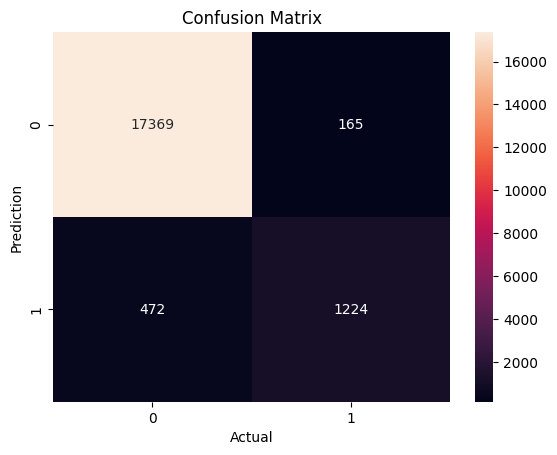

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Calculate ROC curve and AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9756699618369487


# View roc curve

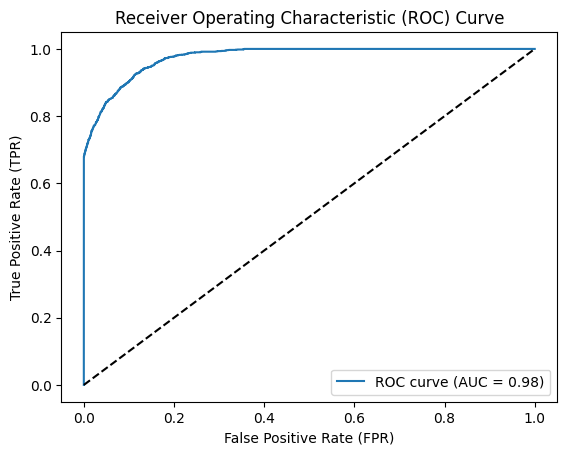

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Inference=  This signifies bette rperformance of mode Roc is above 50% line and Auc score is close to 1

# Calculate the F beta score

In [ ]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score

confusion_mat = confusion_matrix(y_test, y_pred)

# Extract true positives, false positives, and false negatives from the confusion matrix
tn, fp, fn, tp = confusion_mat.ravel()
print(f"TN:{tn},FP:{fp},FN:{fn},TP:{tp}")

# Calculate precision, recall, and F-beta score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
beta = 0.5  # Adjust the beta value as needed
fbeta = fbeta_score(y_test, y_pred, beta=beta)

# Print the precision, recall, and F-beta score
print("Precision:", precision)
print("Recall:", recall)
print("F-beta (beta={0}):".format(beta), fbeta)

TN:17369,FP:165,FN:472,TP:1224
Precision: 0.8812095032397408
Recall: 0.7216981132075472
F-beta (beta=0.5): 0.8439051296194153


Since this is a human sunject as its diabetes, we can say that we need to reduce FN = false negative.  Since here FN>FP we can report this to stakeholders . Also F beta score is less htan 1, means FP>>FN , so its okay

All possbile models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize and train ensemble models
ensemble_models = {
}

for model_name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')


# **Based on PCA, we are now doing the same thing**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape

(96146, 2)

In [ ]:
X.shape

(96146, 12)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc , classification_report

X_train, X_rem, y_train, y_rem = train_test_split(X_pca, y, test_size=0.3, random_state=10, stratify=y)


model_pca = GradientBoostingClassifier()

# Train the model
model_pca.fit(X_train, y_train)

# Predict on the test set
y_pred_pca = model_pca.predict(X_rem)

# Calculate accuracy
accuracy = accuracy_score(y_rem, y_pred_pca)
print("Accuracy:", accuracy)


Accuracy: 0.9444251837470531


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report


# Calculate confusion matrix
confusion_mat = confusion_matrix(y_rem, y_pred_pca)

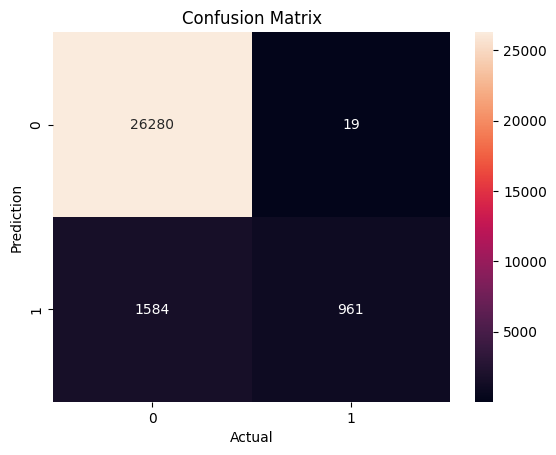

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

Here the error FN value actually increases more from 471 to 1584 after doing PCA dimensonality reduction technique, so better not to go for it
as for human subjects like diabetes, we need to reduce the count of error FN in confusion matrix.
We doesnt need to look for FP as it is considered the error in precision related or non human related classification types

In [ ]:
import pickle

# Assuming you have a trained model object named 'model'
#model = ...  # Your trained model object
#
# Save the model to a file
with open('diabetes_model.pkl', 'wb') as file:
  pickle.dump(model, file)


In [ ]:
import pickle

# Load the model from the file
with open('diabetes_model.pkl', 'rb') as file:
    model_diabetes = pickle.load(file)

# Use the loaded model for inference
# Perform inference using the 'model' object


In [ ]:
model_diabetes

GradientBoostingClassifier()

In [ ]:
pred = model_diabetes.predict(X_test)
pred, pred.ndim

(array([0, 0, 0, ..., 0, 0, 0]), 1)

In [ ]:
row = df1[df1["diabetes"]==1]
row.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
6,0,44.0,0,0,19.31,6.5,200,1,0,0,0,1,0
26,1,67.0,0,1,27.32,6.5,200,1,0,0,0,0,1
38,1,50.0,1,0,27.32,5.7,260,1,1,0,0,0,0
40,1,73.0,0,0,25.91,9.0,160,1,0,0,1,0,0
53,0,53.0,0,0,27.32,7.0,159,1,0,0,1,0,0


In [ ]:
# manual prediction by giving all the columns which we obtained after doing all feature engg and feature scling
# in case of modular coding we can direclty pass this input to these classes of features engg and scaling to get final preprocessed object
# but here we are simply manually giving based on preprocessed data to check if we are getting the prediction correctly

In [ ]:
test1 = [[0,	44.0,	0,	0,	19.31,	6.5,	200,		0,	0,	0,	1,	0]]
test2 = [[1,	67.0,	0	,1,	27.32,	6.5,	200	,	0	,0,	0	,0,	1]]

In [ ]:
pred1 = model_diabetes.predict(test1)
pred2 = model_diabetes.predict(test2)
print(pred1.ndim)
print(pred1, pred2)

1
[1] [1]


so we are getting correct responses from model